Eigen values for n= 0: 0.9999999767771443
Eigen values for n= 1: 2.999999401944479
Eigen values for n= 2: 4.999989530390851
Eigen values for n= 3: 6.999883168882483
Eigen values for n= 4: 8.999060606903189
Eigenfunctions:
[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588473e-02
  4.50516581e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399838e-02
  5.86293690e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583001e-02
  7.58483958e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281002e-02
  9.71899061e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048286e-02
  1.23080898e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653847e-02
  1.53831231e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795041e-02
  1.89559851e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113234e-01]
 [4.48904553e-03 2.03165046e-02 6.18486348e-02 1.45069151e-01
  2.74981544e-01]
 [6.15097107e-03 2.69674234e-02 7.92584568e-02 1.78649425e

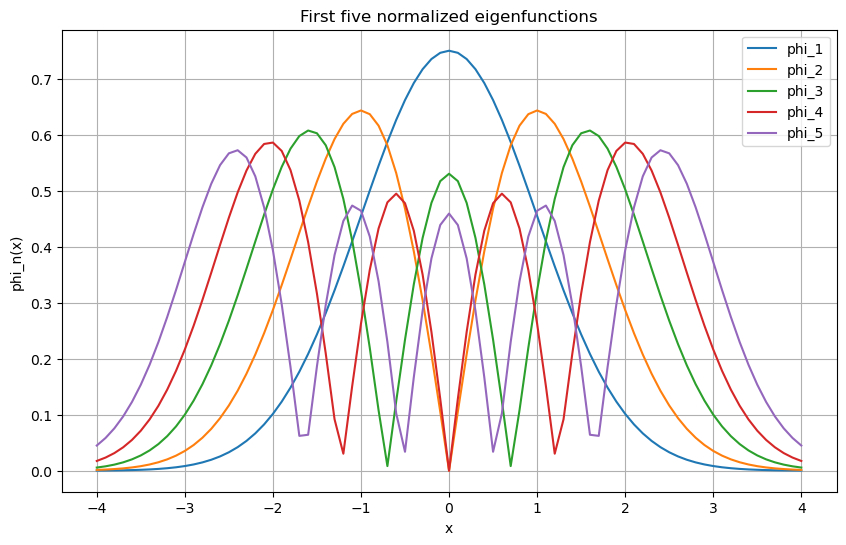

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants from the question
L = 4  #Setting L=4
K = 1  
xspan = np.linspace(-L, L, 81)  
epsilon_n = 0  
d_epsilon = 0.2  
tol = 1e-6  
n_max = 5  

def harmonic_shoot(y, x, epsilon):
    return [y[1], (K * x**2 - epsilon) * y[0]]

eigenfunction = []
eigenvalue = []

for n in range(n_max):
    epsilon_guess = epsilon_n
    d_epsilon = 0.2
    for _ in range(1000):  
        phi0 = [1, np.sqrt(L**2 - epsilon_guess)]  
        y = odeint(harmonic_shoot, phi0, xspan, args=(epsilon_guess,))  
        phi_guess = y[-1, 1] + np.sqrt(L**2 - epsilon_guess) * y[-1, 0]
        if abs(phi_guess) < tol:  
            print(f"Eigen values for n= {n}: {epsilon_guess}")
            eigenvalue.append(epsilon_guess) 
            break

        if (-1) ** (n) * phi_guess > 0:
            epsilon_guess += d_epsilon
        else:
            epsilon_guess -= d_epsilon / 2
            d_epsilon /= 2

    norm = np.trapz(y[:, 0] ** 2, xspan) 
    normalized_eigenfunction = abs(y[:, 0]) / np.sqrt(norm)  
    epsilon_n = epsilon_guess + 0.1
    eigenfunction.append(normalized_eigenfunction)

eigenfunctions = np.column_stack(eigenfunction)
eigenvalues = np.array(eigenvalue)

A1 = eigenfunctions
A2 = eigenvalues

# Output 
print("Eigenfunctions:")
print(A1)
print("Eigenvalues:")
print(A2)
#print(A1 [1,2])

# Plotting the solutions
plt.figure(figsize=(10, 6))
for i in range(n_max):
    plt.plot(xspan, eigenfunctions[:,i], label=f'phi_{i+1}')  

plt.legend()
plt.title('First five normalized eigenfunctions')
plt.xlabel('x')
plt.ylabel('phi_n(x)')
plt.grid(True)
plt.show()


Eigenfunctions (A3): [[1.79266934e-01 1.79267850e-01 1.53019096e-01 1.54708297e-01
  1.06818275e-01]
 [3.44372600e-01 3.44374347e-01 2.85911524e-01 2.89044722e-01
  1.96652459e-01]
 [4.84994945e-01 4.84997377e-01 3.83456589e-01 3.87603408e-01
  2.56772483e-01]
 [5.94870826e-01 5.94873756e-01 4.36547367e-01 4.41169382e-01
  2.80071369e-01]
 [6.71496143e-01 6.71499368e-01 4.42303128e-01 4.46833517e-01
  2.65308595e-01]
 [7.15489814e-01 7.15493132e-01 4.03328584e-01 4.07242689e-01
  2.16427172e-01]
 [7.29793925e-01 7.29797150e-01 3.26428881e-01 3.29298050e-01
  1.41249877e-01]
 [7.18850498e-01 7.18853470e-01 2.21087290e-01 2.22612525e-01
  4.98853661e-02]
 [6.87854424e-01 6.87857012e-01 9.79635540e-02 9.79890506e-02
  4.68617690e-02]
 [6.42141406e-01 6.42143510e-01 3.24026696e-02 3.38933793e-02
  1.38857127e-01]
 [5.86734986e-01 5.86736529e-01 1.60577487e-01 1.63478541e-01
  2.17647192e-01]
 [5.26050629e-01 5.26051560e-01 2.78871903e-01 2.82980470e-01
  2.77066686e-01]
 [4.63737917e-01 4.

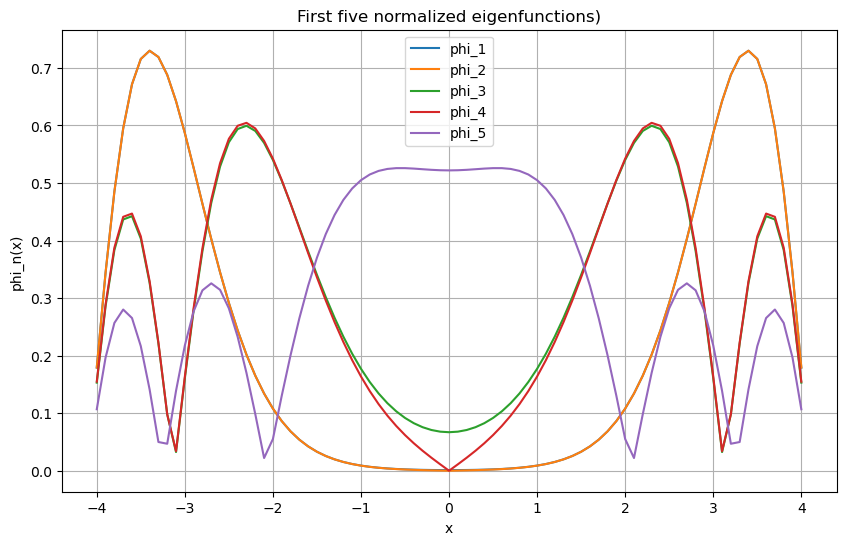

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Constants and grid setup
L = 4
K = 1
xspan = np.arange(-L, L + 0.1, 0.1)  # x values from -L to L with 0.1 spacing
dx = xspan[1] - xspan[0]
n_max = 5  # Number of eigenvalues/eigenfunctions

# Choose a single epsilon value (e.g., a middle range guess)
epsilon = 0.5  # This is an arbitrary value; adjust if needed

# Define the main and off-diagonal elements for the tridiagonal matrix
main_diag = -(2 + dx**2 * (K * xspan**2 - epsilon))  # Main diagonal based on fixed epsilon
off_diag = np.ones(len(xspan) - 1)  # Off-diagonals

# Solve for the smallest eigenvalues and corresponding eigenvectors
eigvals, eigvecs = eigh_tridiagonal(main_diag, off_diag, select='i', select_range=(0, n_max - 1))

# Normalize eigenfunctions and store results
eigenfunctions_b = []
for i in range(n_max):
    chosen_vec = np.abs(eigvecs[:, i])  # Absolute value of eigenfunction
    norm = np.sqrt(np.trapz(chosen_vec**2, xspan))
    normalized_eigenfunction = chosen_vec / norm
    eigenfunctions_b.append(normalized_eigenfunction)

# Store results in A3 and A4
A3 = np.column_stack(eigenfunctions_b)
A4 = eigvals[:n_max]

# Output
print("Eigenfunctions (A3):", A3)
print("Eigenvalues (A4):", A4)

# Plot
plt.figure(figsize=(10, 6))
for i in range(n_max):
    plt.plot(xspan, A3[:, i], label=f'phi_{i+1}')
plt.legend()
plt.title('First five normalized eigenfunctions)')
plt.xlabel('x')
plt.ylabel('phi_n(x)')
plt.grid(True)
plt.show()
